In [3]:
import numpy as np
from astropy.io import fits
from astropy.table import Table as Table
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const
%matplotlib inline

In [5]:
stack1 = fits.open("/Users/jsmonzon/lbg_da/fits_data/composites/observed/lowz/composite.fits")

model1 = fits.open("/Users/jsmonzon/lbg_da/fits_data/composites/modeled/lowz/sed.fits")

stack2 = fits.open("/Users/jsmonzon/lbg_da/fits_data/composites/observed/hiz/composite.fits")

model2 = fits.open("/Users/jsmonzon/lbg_da/fits_data/composites/modeled/hiz/sed.fits")

lowgal= fits.open("/Users/jsmonzon/lbg_da/fits_data/CG274-fits-werr.fits")

In [6]:
wave_1 = stack1[1].data["wavelength"]
flux_1 = stack1[1].data["flux"]
err_1 = stack1[1].data["flux_err"]
model_1 = model1[0].data

wave_2 = stack2[1].data["wavelength"]
flux_2 = stack2[1].data["flux"]
err_2 = stack2[1].data["flux_err"]
model_2 = model2[0].data

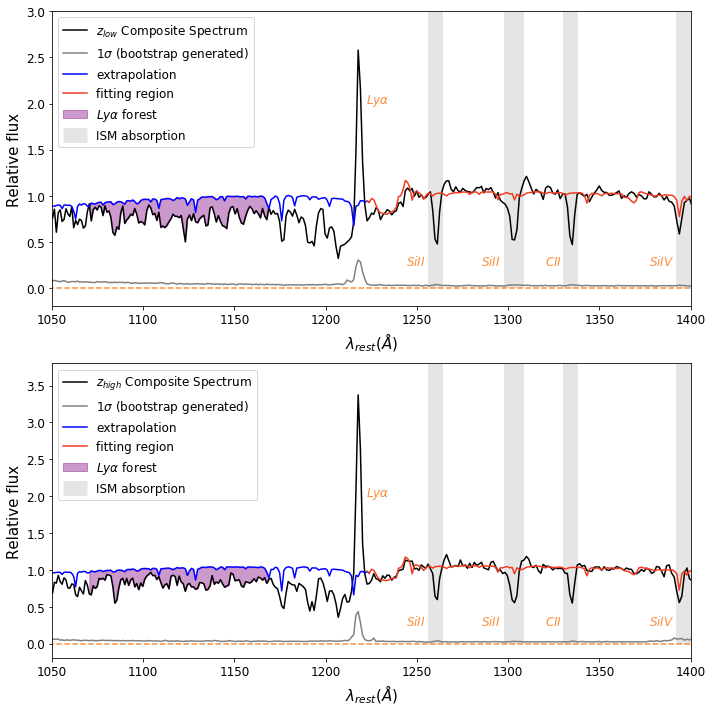

In [8]:
fig, ax = plt.subplots(figsize=(10, 10), tight_layout=True)

#data
plt.subplot(2,1,1)

plt.plot(wave_1, flux_1,label="$z_{low}$ Composite Spectrum",color="black")
plt.plot(wave_1, err_1, label="1$\sigma$ (bootstrap generated)",color="grey")

plt.plot(wave_1[wave_1 < 1225], model_1[wave_1 < 1225], label="extrapolation",color="blue")
plt.plot(wave_1[wave_1 > 1222], model_1[wave_1 > 1222], label="fitting region",color="#f03b20")

plt.fill_between(wave_1, model_1, flux_1, where= (1070 < wave_1) & (wave_1 < 1170),
                 color="purple", alpha = .4, label="$Lyα$ forest")

#interstellar absorption features
plt.text(1244.,.25,"$SiII$",fontsize=12,color="#fd8d3c")
plt.vlines(1260,0,4, lw = 15, color="grey", alpha=.2, label="ISM absorption")

plt.text(1285.,.25,"$SiII$",fontsize=12,color="#fd8d3c")
plt.vlines(1303,0,4, lw = 20, color="grey", alpha=.2)

plt.text(1320.,.25,"$CII$",fontsize=12,color="#fd8d3c")
plt.vlines(1334,0,4, lw = 15, color="grey", alpha=.2)

plt.text(1377.,.25,"$SiIV$",fontsize=12,color="#fd8d3c")
plt.vlines(1396,0,4, lw = 15, color="grey", alpha=.2)

#emission features
plt.text(1222,2.0,"$Lyα$",fontsize=12,color="#fd8d3c")

#axis
plt.xlabel("$\lambda_{rest} (\AA)$",fontsize=15)
plt.ylabel("Relative flux",fontsize=15)
plt.hlines(0,1000,1500, color="#fd8d3c",linestyle="--")

#misc
plt.legend(fontsize=12, loc=2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(1050,1400)
plt.ylim(-.2,3.0)

#--------------------------------------------------------------------------
plt.subplot(2,1,2)

#data
plt.plot(wave_2, flux_2,label="$z_{high}$ Composite Spectrum",color="black")
plt.plot(wave_2, err_2, label="1$\sigma$ (bootstrap generated)",color="grey")

plt.plot(wave_2[wave_2 < 1225], model_2[wave_2 < 1225], label="extrapolation",color="blue")
plt.plot(wave_2[wave_2 > 1222], model_2[wave_2 > 1222], label="fitting region",color="#f03b20")

plt.fill_between(wave_2, model_2, flux_2, where= (1070 < wave_2) & (wave_2 < 1170),
                 color="purple", alpha = .4, label="$Lyα$ forest")

#interstellar absorption features
plt.text(1244.,.25,"$SiII$",fontsize=12,color="#fd8d3c")
plt.vlines(1260,0,4, lw = 15, color="grey", alpha=.2, label="ISM absorption")

plt.text(1285.,.25,"$SiII$",fontsize=12,color="#fd8d3c")
plt.vlines(1303,0,4, lw = 20, color="grey", alpha=.2)

plt.text(1320.,.25,"$CII$",fontsize=12,color="#fd8d3c")
plt.vlines(1334,0,4, lw = 15, color="grey", alpha=.2)

plt.text(1377.,.25,"$SiIV$",fontsize=12,color="#fd8d3c")
plt.vlines(1396,0,4, lw = 15, color="grey", alpha=.2)

#emission features
plt.text(1222,2.0,"$Lyα$",fontsize=12,color="#fd8d3c")

#axis
plt.xlabel("$\lambda_{rest} (\AA)$",fontsize=15)
plt.ylabel("Relative flux",fontsize=15)
plt.hlines(0,1000,1500, color="#fd8d3c",linestyle="--")

#misc
plt.legend(fontsize=12, loc=2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(1050,1400)
plt.ylim(-.2,3.8)

plt.savefig("/Users/jsmonzon/lbg_da/figures/composite_models.pdf")
plt.show()

In [7]:
fix = np.argsort(lowgal[1].data[0]["wave"])

wave = lowgal[1].data[0]["wave"][fix]

flux = lowgal[1].data[0]["flux"][fix]

model = lowgal[1].data[0]["cont"][fix]

err = lowgal[1].data[0]["err"][fix]

In [18]:
new_ISM = np.array([1175, 1238.82, 1316.2, 1335.71, 1393.76])

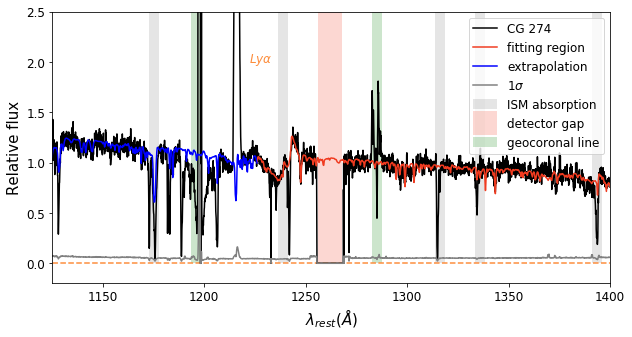

In [20]:
plt.figure(figsize=(10,5))

plt.plot(wave, flux, label="CG 274", color="black")

plt.plot(wave[wave > 1226], model[wave > 1226], label="fitting region", color="#f03b20")
plt.plot(wave[wave < 1226], model[wave < 1226], label="extrapolation", color="blue")

plt.plot(wave, err, label="1$\sigma$", color="grey")

#------------------------------

for i, line in enumerate(new_ISM):
    
    if i==0:
        plt.vlines(line,0,3, color="grey", alpha=.2, lw=10, label="ISM absorption")
    else:
        plt.vlines(line,0,3, color="grey", alpha=.2, lw=10)


plt.vlines(1262,0,3, color="#f03b20", alpha=.2, lw=24, label="detector gap")
plt.vlines(1196,0,3, color="green", alpha=.2, lw=10, label="geocoronal line")
plt.vlines(1285,0,3, color="green", alpha=.2, lw=10)

#emission features
plt.text(1222,2.0,"$Lyα$",fontsize=12,color="#fd8d3c")

#axis
plt.xlabel("$\lambda_{rest} (\AA)$",fontsize=15)
plt.ylabel("Relative flux",fontsize=15)
plt.hlines(0,1000,1500, color="#fd8d3c",linestyle="--")

#misc
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(1125,1400)
plt.ylim(-.2,2.5)

plt.savefig("/Users/jsmonzon/lbg_da/figures/CG274_sb99.pdf")
plt.show()